In [62]:
import qiskit
from qiskit import QuantumCircuit, Aer, assemble, transpile
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [38]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.2', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [39]:
qc=QuantumCircuit(3)
for qubit in range(3):
    qc.h(qubit)
    
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [40]:
simulator=Aer.get_backend('aer_simulator')
qc=transpile(qc, simulator)

In [41]:
result=simulator.run(qc).result()

In [42]:
qc.save_statevector()

In [43]:
final_state=simulator.run(qc).result().get_statevector()

In [44]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector}=")

<IPython.core.display.Latex object>

In [45]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [46]:
usim=Aer.get_backend('aer_simulator')
qc.save_unitary()
#qc = transpile(qc, usim)
unitary=usim.run(transpile(qc, usim)).result().get_unitary()

In [47]:
array_to_latex(unitary, prefix="\\text{Circuit=}\n")

<IPython.core.display.Latex object>

In [48]:
qc=QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [49]:
usim=Aer.get_backend('aer_simulator')
qc.save_unitary()
unitary=usim.run(transpile(qc)).result().get_unitary()

In [50]:
array_to_latex(unitary, prefix="\\text{Circuit=}\n")

<IPython.core.display.Latex object>

In [69]:
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

When our qubits are not in superposition of |0> and |1> (behaving as classical bits), this gate is very simple and intuitive to understand.
We can use the classical truth table as.
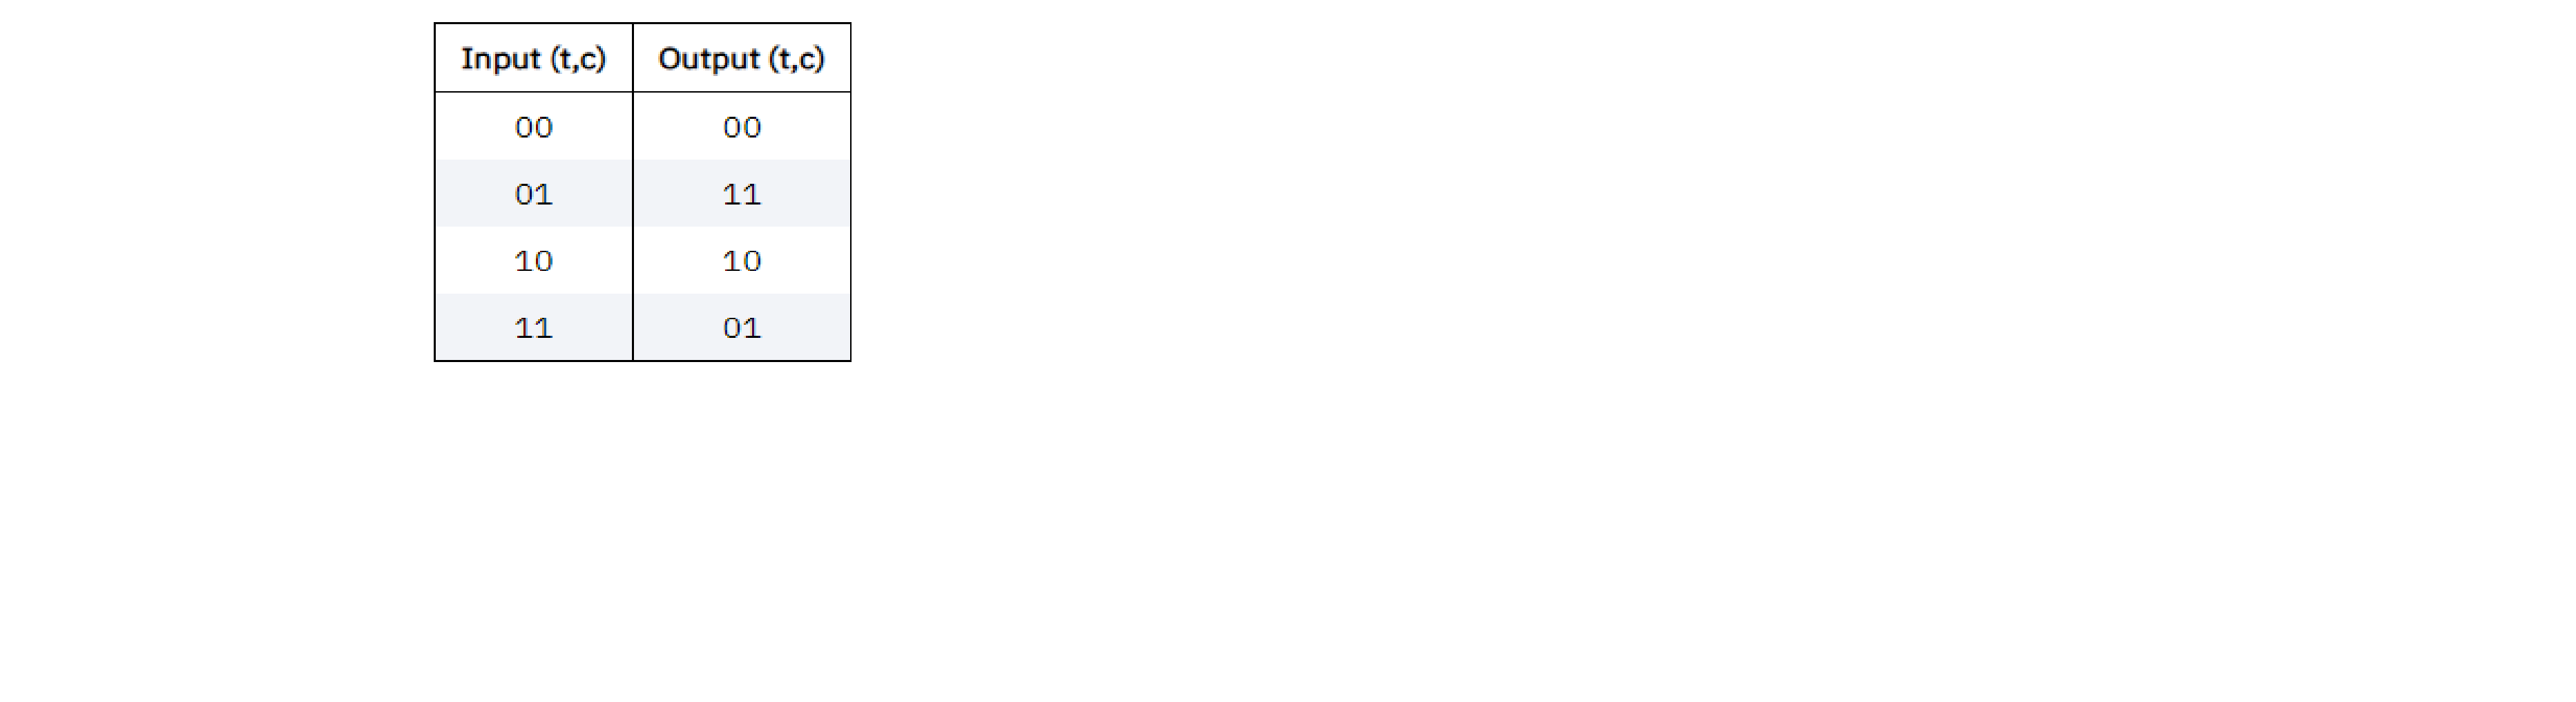

Acting on our 4D-statevectors, it has one of the two matrices,

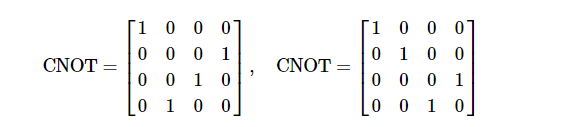

depending on which qubit is taken as control and which is taken as the target qubit.
For the circuit above, the 1st one is the corresponding matrix.

This matrix swaps the amplitudes of |01> and |11> in our statevector as, 
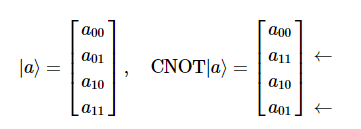

In [72]:
qc=QuantumCircuit(2)
qc.h(0)
qc.draw()
svsim=Aer.get_backend('aer_simulator')
qc.save_statevector()
transpile(qc)
#qobj=assemble(qc)
final_state=svsim.run(qc).result().get_statevector()


In [73]:
array_to_latex(final_state, prefix="\\text{Statevector= }")

<IPython.core.display.Latex object>

Now, applying CNOT gate to the circuit above,

In [74]:
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [77]:
qc.save_statevector()
transpile(qc, svsim)
final_state=svsim.run(qc).result().get_statevector()


In [80]:
array_to_latex(final_state, prefix="\\text{Statevector =}")

<IPython.core.display.Latex object>

This introduces THE ENTANGLED STATE. 
We call it a BELL STATE
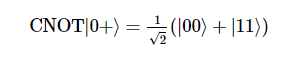

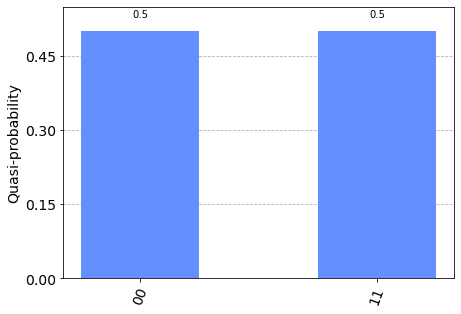

In [82]:
plot_histogram(svsim.run(qc).result().get_counts())

We see that this state has 50% chance of being measured in state |00> and 50% chance of being measured in state |11>, and 0% chance of being measured in state |01> or |10>.